Columns in people.csv:
['person', 'demog3', 'demog4', 'income_bin', 'has_dog']

Columns in exposures.csv:
['person', 'ad_id', 'time', 'channel_id']

Columns in site_visits.csv:
['person', 'time']
Calculate exposure frequency

Exposure Frequency Descriptive Statistics:
count    9663.000000
mean       13.715202
std        18.938051
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max       523.000000
Name: exposure_count, dtype: float64
      person  exposure_count    demog3    demog4  income_bin  has_dog
0       2648             523  2.186928 -2.490602           5    False
1       2155             446 -0.299305 -0.549698           5     True
2       4006             416  0.158717  0.219885           5    False
3       5870             329  1.706551  0.180851           5     True
4         50             227  2.239418 -1.423470           5     True
...      ...             ...       ...       ...         ...      ...
9658    6017               1 -0.5404

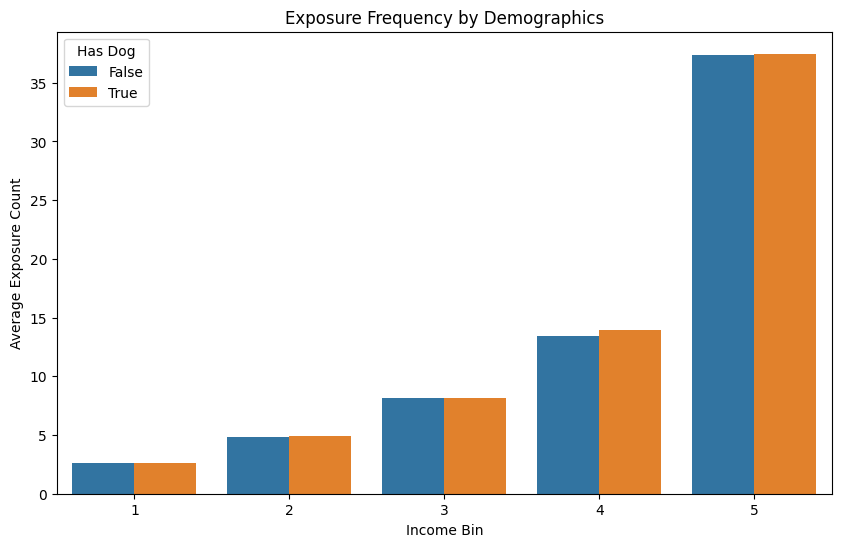

Income Bin and Exposure Frequency
Higher income bins (4 and 5) have significantly higher average exposure counts compared to lower income bins (1 and 2) there is a clear positive trend: as the income bin increases, the average exposure count also increases.
Has Dog vs. No Dog:
There is no significant difference in exposure frequency between individuals who have a dog and those who do not across all income bins. Both groups follow a similar pattern in terms of exposure frequency.


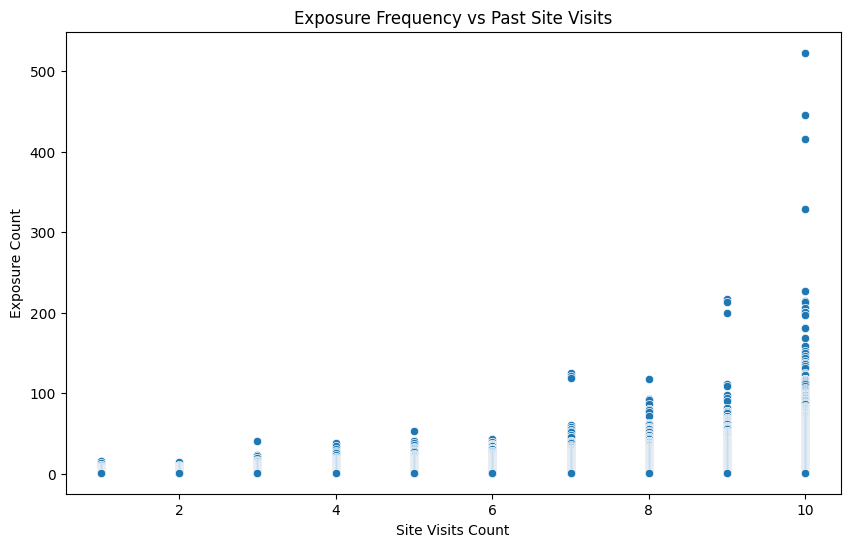

Exposure Frequency vs Past Site Visits Results
Positive Correlation: There is a clear positive correlation between the number of past site visits and exposure count. Individuals with more site visits tend to have higher exposure counts. Outliers: Some individuals have exceptionally high exposure counts compared to others with the same number of site visits, indicating that other factors might also influence exposure frequency


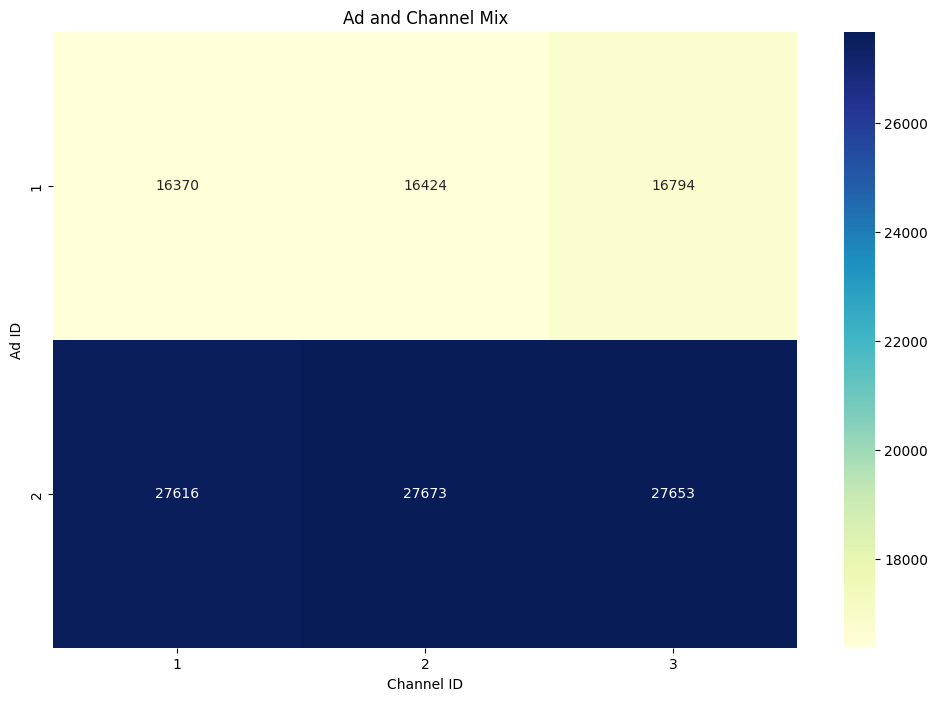

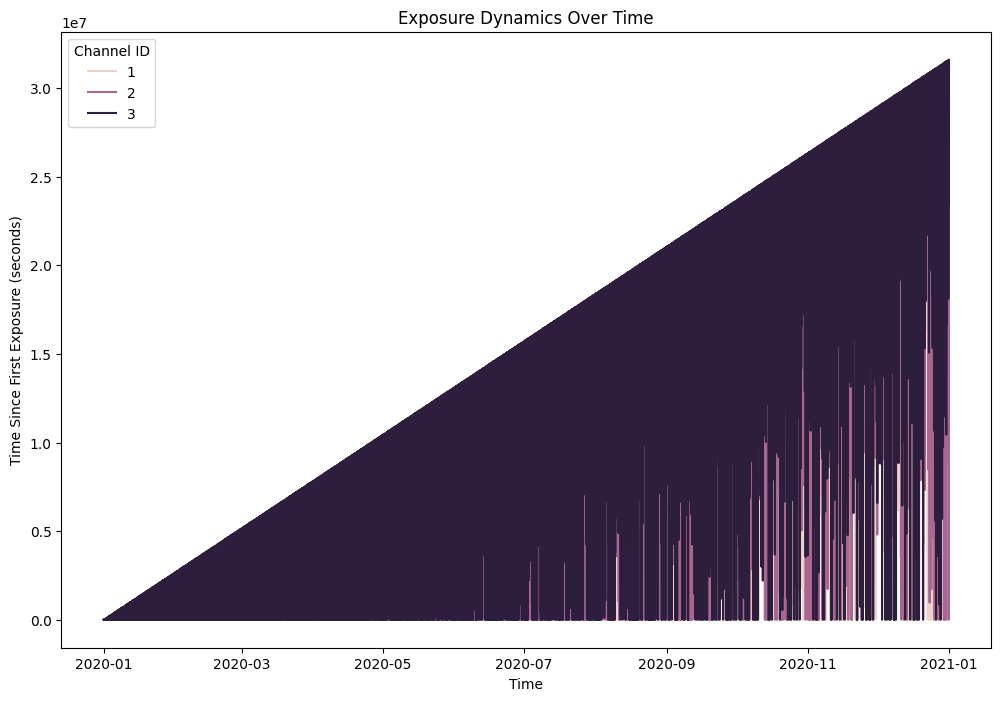

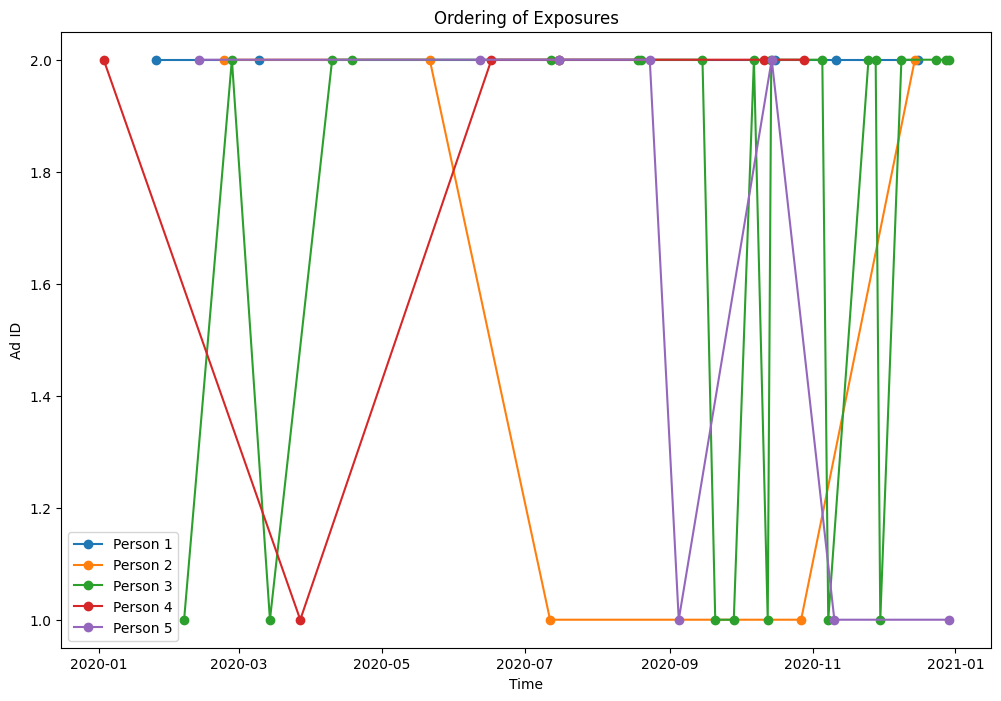


Exposure-level Analysis Results:
1. Ad and Channel Mix:
The heatmap shows the distribution of ad exposures across different channels. Ad ID 2 has more exposures compared to Ad ID 1 across all channels.

2. Exposure Dynamics:
The line plot indicates the time since the first exposure for each channel. Exposures increase over time, with more frequent exposures observed later in the timeframe.

3. Ordering of Exposures:
The line plot with markers shows the ordering of exposures for five example people. It illustrates how different ads were shown to these individuals over time.
Exploratory data analysis results have been written to data_analysis_log.txt


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
people_df = pd.read_csv('../data/people.csv')
exposures_df = pd.read_csv('../data/exposures.csv')
site_visits_df = pd.read_csv('../data/site_visits.csv')

# Print columns in each CSV file
print("Columns in people.csv:")
print(people_df.columns.tolist())

print("\nColumns in exposures.csv:")
print(exposures_df.columns.tolist())

print("\nColumns in site_visits.csv:")
print(site_visits_df.columns.tolist())

# Convert time columns to datetime
exposures_df['time'] = pd.to_datetime(exposures_df['time'])
site_visits_df['time'] = pd.to_datetime(site_visits_df['time'])

# Left Join
merged_df = exposures_df.merge(people_df, on='person', how='left')

# Calculate exposure frequency
print("Calculate exposure frequency")
exposure_frequency = merged_df['person'].value_counts().reset_index()
exposure_frequency.columns = ['person', 'exposure_count']

# Descriptive statistics for exposure frequency
exposure_stats = exposure_frequency['exposure_count'].describe()
print("\nExposure Frequency Descriptive Statistics:")
print(exposure_stats)

# Merge exposure frequency with people_df to analyze demographics influence
demographics_analysis_df = exposure_frequency.merge(people_df, on='person', how='left')
print(demographics_analysis_df)
# Exposure Frequency Demographics
# Analyze exposure frequency by demographics
exposure_by_demographics = demographics_analysis_df.groupby(['income_bin', 'has_dog']).agg(
    exposure_count_mean=('exposure_count', 'mean'),
    exposure_count_std=('exposure_count', 'std'),
).reset_index()
print(exposure_by_demographics)


# Exposure Frequency Past Site Visits
# Count site visits for each person
site_visits_count = site_visits_df['person'].value_counts().reset_index()
site_visits_count.columns = ['person', 'site_visits_count']

# Merge with exposure frequency
# site visits dont come before exposure
exposure_vs_site_visits = exposure_frequency.merge(site_visits_count, on='person', how='left')

# Visualization: Exposure Frequency by Demographics
plt.figure(figsize=(10, 6))
sns.barplot(data=exposure_by_demographics, x='income_bin', y='exposure_count_mean', hue='has_dog')
plt.title('Exposure Frequency by Demographics')
plt.xlabel('Income Bin')
plt.ylabel('Average Exposure Count')
plt.legend(title='Has Dog')
plt.savefig('exposure_frequency_by_demographics.png')
plt.show()

print("Income Bin and Exposure Frequency")
print("Higher income bins (4 and 5) have significantly higher average exposure counts compared to lower income bins (1 and 2) there is a clear positive trend: as the income bin increases, the average exposure count also increases.")
print("Has Dog vs. No Dog:")
print("There is no significant difference in exposure frequency between individuals who have a dog and those who do not across all income bins. Both groups follow a similar pattern in terms of exposure frequency.")

# Visualization: Exposure Frequency vs Past Site Visits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exposure_vs_site_visits, x='site_visits_count', y='exposure_count')
plt.title('Exposure Frequency vs Past Site Visits')
plt.xlabel('Site Visits Count')
plt.ylabel('Exposure Count')
plt.savefig('exposure_frequency_vs_past_site_visits.png')
plt.show()

print("Exposure Frequency vs Past Site Visits Results")
print("Positive Correlation: There is a clear positive correlation between the number of past site visits and exposure count. Individuals with more site visits tend to have higher exposure counts. Outliers: Some individuals have exceptionally high exposure counts compared to others with the same number of site visits, indicating that other factors might also influence exposure frequency")

# Exposure-level Analysis
# 1. Ad and Channel Mix
ad_channel_mix = exposures_df.groupby(['ad_id', 'channel_id']).size().reset_index(name='count')

# Visualization: Ad and Channel Mix
plt.figure(figsize=(12, 8))
pivot_table = ad_channel_mix.pivot(index='ad_id', columns='channel_id', values='count')
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Ad and Channel Mix')
plt.xlabel('Channel ID')
plt.ylabel('Ad ID')
plt.savefig('ad_channel_mix.png')
plt.show()

# 2. Exposure Dynamics
# Calculate the time from the first exposure for each person
exposures_df = exposures_df.sort_values(by=['person', 'time'])
exposures_df['time_since_first_exposure'] = exposures_df.groupby('person')['time'].transform(lambda x: x - x.min()).dt.total_seconds()




# Visualization: Exposure Dynamics
plt.figure(figsize=(12, 8))
sns.lineplot(data=exposures_df, x='time', y='time_since_first_exposure', hue='channel_id', errorbar=None)
plt.title('Exposure Dynamics Over Time')
plt.xlabel('Time')
plt.ylabel('Time Since First Exposure (seconds)')
plt.legend(title='Channel ID')
plt.savefig('exposure_dynamics.png')
plt.show()

# 3. Ordering of Exposures
# We can look at the order of exposures for a few example people
example_people = exposures_df['person'].unique()[:5]
example_exposures = exposures_df[exposures_df['person'].isin(example_people)]

# Visualization: Ordering of Exposures
plt.figure(figsize=(12, 8))
for person in example_people:
    person_data = example_exposures[example_exposures['person'] == person]
    plt.plot(person_data['time'], person_data['ad_id'], marker='o', linestyle='-', label=f'Person {person}')
plt.title('Ordering of Exposures')
plt.xlabel('Time')
plt.ylabel('Ad ID')
plt.legend()
plt.savefig('ordering_of_exposures.png')
plt.show()

# Print Exposure-level analysis results
print("\nExposure-level Analysis Results:")
print("1. Ad and Channel Mix:")
print("The heatmap shows the distribution of ad exposures across different channels. Ad ID 2 has more exposures compared to Ad ID 1 across all channels.")

print("\n2. Exposure Dynamics:")
print("The line plot indicates the time since the first exposure for each channel. Exposures increase over time, with more frequent exposures observed later in the timeframe.")

print("\n3. Ordering of Exposures:")
print("The line plot with markers shows the ordering of exposures for five example people. It illustrates how different ads were shown to these individuals over time.")

# Open a log file to write the results
with open('data_analysis_log.txt', 'w') as log_file:
    log_file.write("People DataFrame Head:\n")
    log_file.write(people_df.head().to_string())
    log_file.write("\n\nExposures DataFrame Head:\n")
    log_file.write(exposures_df.head().to_string())
    log_file.write("\n\nSite Visits DataFrame Head:\n")
    log_file.write(site_visits_df.head().to_string())
    log_file.write("\n\n")
    log_file.write(f"Total number of rows in people.csv: {len(people_df)}\n")
    log_file.write(f"Total number of rows in exposures.csv: {len(exposures_df)}\n")
    log_file.write(f"Total number of rows in site_visits.csv: {len(site_visits_df)}\n")

    log_file.write("\nExposure Frequency Analysis:\n")
    log_file.write(f"Exposure frequency (first 10 rows):\n{exposure_frequency.head(10)}\n")
    
    log_file.write("\nExposure Frequency Descriptive Statistics:\n")
    log_file.write(exposure_stats.to_string())
    
    log_file.write("\nExposure Frequency by Demographics:\n")
    log_file.write(exposure_by_demographics.to_string(index=False))
    
    log_file.write("\nExposure Frequency vs Past Site Visits:\n")
    log_file.write(exposure_vs_site_visits.head(10).to_string(index=False))

    log_file.write("\nAd and Channel Mix:\n")
    log_file.write(ad_channel_mix.to_string(index=False))
    
    log_file.write("\nExposure Dynamics:\n")
    log_file.write(exposures_df[['person', 'time', 'time_since_first_exposure']].head(10).to_string(index=False))
    
    log_file.write("\nOrdering of Exposures (for example people):\n")
    log_file.write(example_exposures[['person', 'time', 'ad_id']].head(10).to_string(index=False))

print("Exploratory data analysis results have been written to data_analysis_log.txt")
